# Covid case dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('covid_case.csv',parse_dates=["Date"])
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [7]:
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [8]:
df.shape

(23688, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       23688 non-null  datetime64[ns]
 1   Country    23688 non-null  object        
 2   Confirmed  23688 non-null  int64         
 3   Recovered  23688 non-null  int64         
 4   Deaths     23688 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 925.4+ KB


In [10]:
df.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


In [11]:
df.nunique()

Date          126
Country       188
Confirmed    5308
Recovered    3303
Deaths       1768
dtype: int64

In [12]:
df.values

array([[Timestamp('2020-01-22 00:00:00'), 'Afghanistan', 0, 0, 0],
       [Timestamp('2020-01-22 00:00:00'), 'Albania', 0, 0, 0],
       [Timestamp('2020-01-22 00:00:00'), 'Algeria', 0, 0, 0],
       ...,
       [Timestamp('2020-05-26 00:00:00'), 'Yemen', 249, 10, 49],
       [Timestamp('2020-05-26 00:00:00'), 'Zambia', 920, 336, 7],
       [Timestamp('2020-05-26 00:00:00'), 'Zimbabwe', 56, 25, 4]],
      dtype=object)

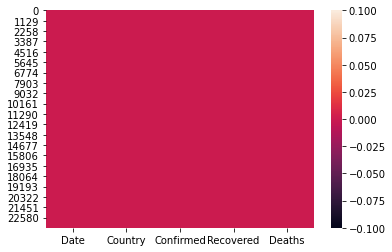

In [13]:
sns.heatmap(df.isnull())
plt.show()

In [14]:
#parse date
df_covid_dates=pd.DataFrame()
df_covid_dates["month"]=df["Date"].dt.month_name()
df_covid_dates["year"]=df["Date"].dt.year
df_covid_dates["day"]=df["Date"].dt.day_name()
df_covid_dates["Recovered"]=df["Recovered"]
df_covid_dates["Deaths"]=df["Deaths"]
df_covid_dates


,month,year,day,Recovered,Deaths
0,January,2020,Wednesday,0,0
1,January,2020,Wednesday,0,0
2,January,2020,Wednesday,0,0
3,January,2020,Wednesday,0,0
4,January,2020,Wednesday,0,0
...,...,...,...,...,...
23683,May,2020,Tuesday,365,3
23684,May,2020,Tuesday,6,1
23685,May,2020,Tuesday,10,49
23686,May,2020,Tuesday,336,7


In [15]:
df_covid_dates[{"month","year"}].drop_duplicates()

,year,month
0,2020,January
1880,2020,February
7332,2020,March
13160,2020,April
18800,2020,May


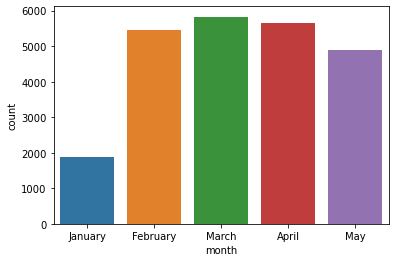

In [16]:
sns.countplot(x="month",data=df_covid_dates)
plt.show()

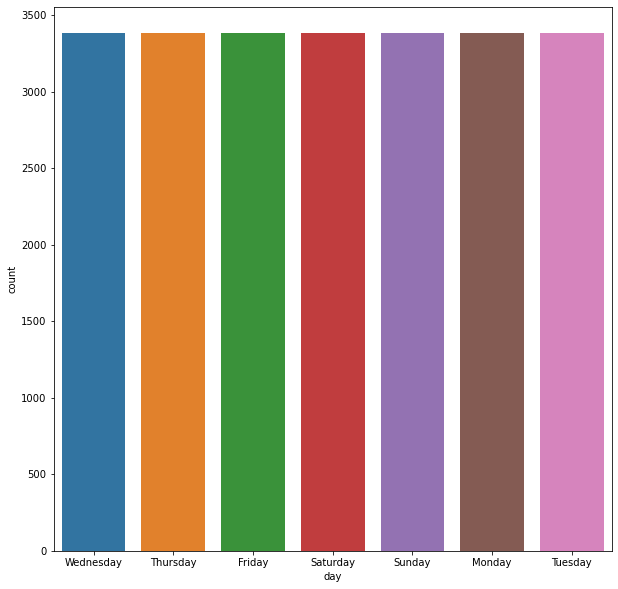

In [17]:
plt.figure(figsize=(10,10))
sns.countplot(x="day",data=df_covid_dates)

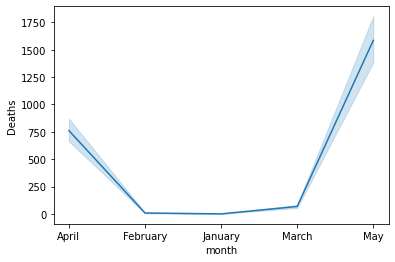

In [18]:
sns.lineplot(x="month",y="Deaths",data=df_covid_dates)

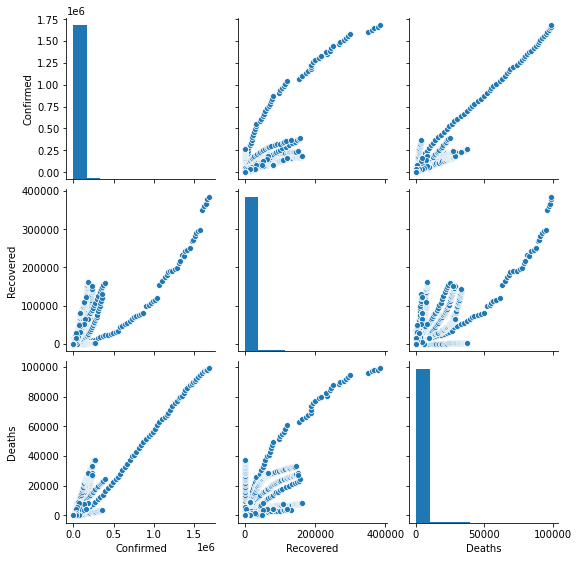

In [19]:
sns.pairplot(df)

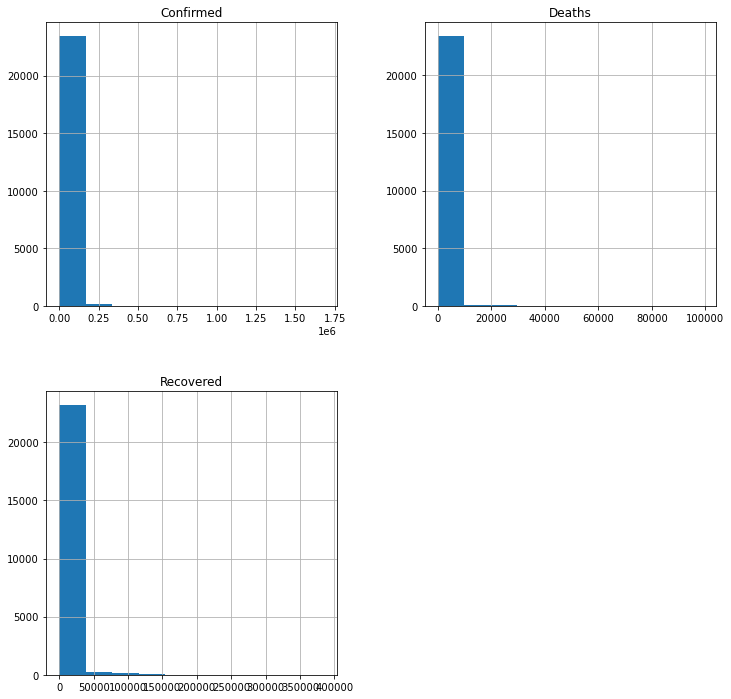

In [20]:
df.hist(figsize=(12,12))
plt.show()

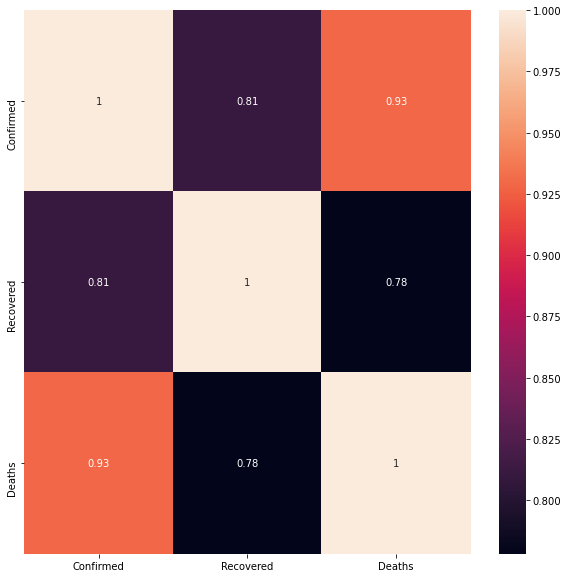

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [22]:
df_x=df.drop(columns=["Deaths","Date","Country"])
y=pd.DataFrame(df["Deaths"])

In [23]:
df_x.head()

,Confirmed,Recovered
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [24]:
df_x.tail()

,Confirmed,Recovered
23683,429,365
23684,9,6
23685,249,10
23686,920,336
23687,56,25


In [25]:
y.head()

,Deaths
0,0
1,0
2,0
3,0
4,0


In [26]:
y.tail()

,Deaths
23683,3
23684,1
23685,49
23686,7
23687,4


In [27]:
#Scalling 
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [28]:
#import libraries for model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [30]:
x_train.shape,y_train.shape

((15870, 2), (15870, 1))

In [31]:
y_test.shape,x_test.shape

((7818, 1), (7818, 2))

In [32]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [33]:
lr.coef_

array([[3465.67710442,  285.52776398]])

In [34]:
lr.intercept_

array([519.50358636])

In [35]:
lr.score(x_train,y_train)

0.8599133279722059

In [36]:
pred=lr.predict(x_test)
print("Predicted result score",pred)
print("actual score",y_test)

Predicted result score [[ -1.94978376]
 [ -1.7124893 ]
 [ -1.94978376]
 ...
 [140.83658473]
 [ -1.94978376]
 [  1.33187075]]
actual score        Deaths
2300        0
14284       0
7298        0
7733        0
19527    1784
...       ...
69          0
11034       3
19395      64
8203        0
8889        1

[7818 rows x 1 columns]


In [37]:
print('error:')

print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))

print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 261.00344500116097
Mean squared error: 2136522.4132211483
Root Mean Squared Error: 1461.684785862242


In [38]:
print(r2_score(y_test,pred))

0.8769847901618292


In [39]:
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),x,y,cv=10,scoring="r2").mean()

0.07204846233157877

In [40]:
 import joblib

#save the model
joblib.dump(pred,'death_score.pkl')

['death_score.pkl']